<a href="https://colab.research.google.com/github/pablocanas/Plan-B/blob/master/Copia_de_Plan_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import pandas as pd
from math import *
from astropy.constants import G
!pip install astroquery

In [2]:
planetas=pd.read_csv("https://raw.githubusercontent.com/astrodatos/proyecto_ps2/master/compositepars_2019.07.07_14.34.43.csv", comment = '#')
print(planetas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 100 columns):
fpl_hostname         4009 non-null object
fpl_letter           4009 non-null object
fpl_name             4009 non-null object
fpl_controvflag      4009 non-null int64
fpl_disc             4009 non-null int64
fpl_orbper           3906 non-null float64
fpl_orbpererr1       3771 non-null float64
fpl_orbpererr2       3771 non-null float64
fpl_orbperlim        3935 non-null float64
fpl_smax             2508 non-null float64
fpl_smaxerr1         1682 non-null float64
fpl_smaxerr2         1681 non-null float64
fpl_smaxlim          2548 non-null float64
fpl_eccen            1510 non-null float64
fpl_eccenerr1        1061 non-null float64
fpl_eccenerr2        1061 non-null float64
fpl_eccenlim         1710 non-null float64
fpl_bmasse           3985 non-null float64
fpl_bmasseerr1       1552 non-null float64
fpl_bmasseerr2       1552 non-null float64
fpl_bmasselim        3987 non-null floa

Definiendo la habitabilidad

In [3]:
planetas = pd.DataFrame(planetas)
Ts = 5700 #K
ai = 2.7619 * 10**(-5)
bi = 3.8095 * 10**(-9)
ao = 1.3786 * 10**(-4)
bo = 1.4286 * 10**(-9)
ris = 0.72
ros = 1.77
planetas = planetas.filter(['fpl_orbper','fpl_bmasse','fst_mass','fst_teff','fst_lum'], axis=1)
planetas = planetas.dropna()
Teff = planetas['fst_teff']
lum = 10**(planetas['fst_lum'])
T = planetas['fpl_orbper']
m = planetas['fpl_bmasse']
M = planetas['fst_mass']
suma = M + m
r = np.array(((G*suma*(T)**2)/(4*(pi)**2))**(1/3))
resta = Teff - Ts

#Distancia del borde más lejano de la zona habitable a la estrella, en UA
Ri = (ris - ai*resta - bi*(resta)**2)/np.sqrt(lum)
#Distancia del borde más cercano de la zona habitable a la estrella, en UA
Ro = (ros - ao*resta - bo*(resta)**2)/np.sqrt(lum)
#índice de habitabilidad 
resta1 = Ro - Ri
resta2 = 2*r - Ro - Ri
HDZ = resta2/resta1


planetas['HDZ'] = HDZ
mask_1 = -1<=planetas['HDZ'] 
mask_2 = planetas['HDZ'] <= 1
booleanos = np.logical_and(mask_1, mask_2)
booleanos = booleanos.astype(int)
planetas['Habitabilidad'] = booleanos
print(planetas)

habitables = planetas[(-1<=(planetas['HDZ']))|((planetas['HDZ'])<=1)]



        fpl_orbper  fpl_bmasse  fst_mass  ...  fst_lum       HDZ  Habitabilidad
0       326.030000   6165.6000      2.70  ...    2.243  0.081433              1
1       516.219970   4684.8142      2.78  ...    2.430  1.218163              0
2       185.840000   1525.5000      2.20  ...    1.763 -1.698284              0
3      1773.400020   1481.0878      0.90  ...   -0.151 -2.031467              0
4       798.500000    565.7374      1.08  ...    0.100 -2.193690              0
5       993.300000   3273.5000      2.30  ...    1.602 -0.335040              1
7        30.350600    289.2253      0.99  ...    1.774 -2.193579              0
8       452.800000    632.4600      1.54  ...    1.164 -1.903594              0
9       883.000000    273.3200      1.54  ...    1.164 -1.828770              0
14      416.000000    603.8770      0.48  ...    0.168 -2.498228              0
15     7336.500000   6657.4800      0.08  ...   -3.480 -2.038969              0
17      335.100010   4392.4106      1.93

Gráficos

Text(0.5, 1.0, 'Planetas y su habitabilidad')

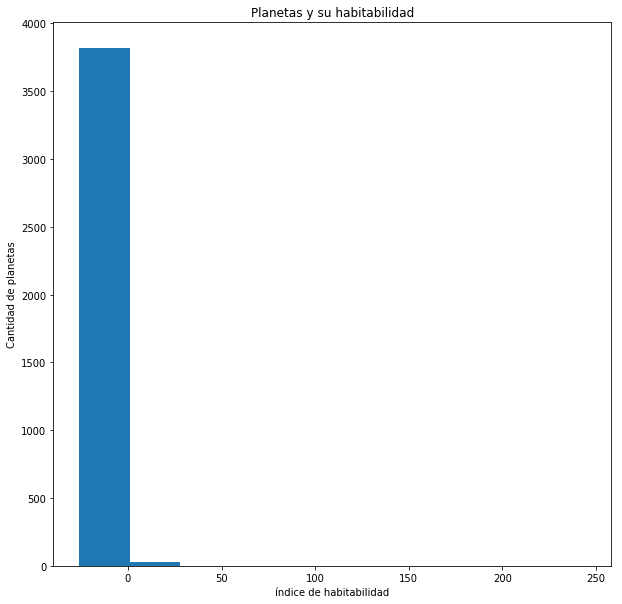

In [0]:
#Hisotgrama de índice de habitabilidad 
plt.figure(figsize = (10,10))
plt.hist(planetas['HDZ'])
plt.xlabel('índice de habitabilidad')
plt.ylabel('Cantidad de planetas')
plt.title('Planetas y su habitabilidad')

Text(0.5, 1.0, 'Planetas habitables')

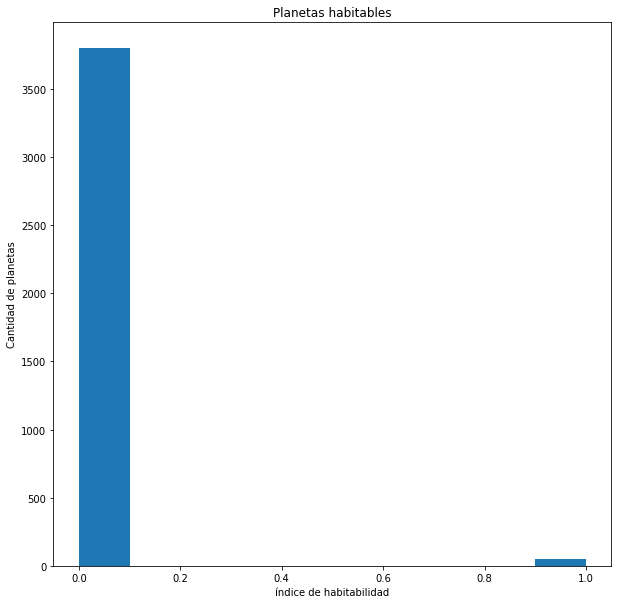

In [0]:
#Histograma de los planetas habitables
plt.figure(figsize = (10,10))
plt.hist(booleanos)
plt.xlabel('índice de habitabilidad')
plt.ylabel('Cantidad de planetas')
plt.title('Planetas habitables')

Machine Learning

In [0]:
X = np.array(data_df.iloc[:,:-1])
Y = booleanos
from sklearn.model_selection import train_test_split